### MTH 610 Model Constrained Optimization 1 (Homework 1)

##### Emily Bogle
##### 10/17/23

### Problem 1

### Problem 2
Consider the multistage system obtained by applying Euler's method to the IVP (1-2)


$$
x_{i+1}=x_i+h[a x_i+u_i], \ i=0:N-1 
$$

$$
x_0=\overline{x_0} 
$$

with the specified initial value $\overline{x_0}$. The time step $h$ is taken as $h=\frac{1}{N}$, such that $x_N$ is the discrete version of the solution to (1)-(2) at time $t=1$.

The cost functional is also defined as a discrete version to (3),
$$
\tilde{J}(x,u)= \frac{1}{2} x_N^2 +\frac{h}{2} \sum\limits_{i=0}^{N-1}[x_i^2+u_i^2] 
$$

- Find the expression of control vector $\mathbf{u}\in \mathbb{R}^N$ the minimizes $\tilde{J}$ subject to the model constraints and with the specified initial condition $\overline{x_0}$.
- Plot the discrete optimal control $u$, state $x$ and the Lagrange multipliers $\lambda$ for each othe following
    - $\overline{x_0}=2, a=1$
    - $\overline{x_0}=2, a=-1$
  Compare with the results obtained in the continuous formulation (Problem 1).

Use $N=100$ for the plots. 
  

We will first find an expression for  $\mathbf{u}\in\mathbb{R}^N$ minimizing $\tilde{J}$ subject to model constraints and with specified initial condition $\overline{x_0}$. We have the following optimization problem:

$$
\min \frac{1}{2}x_N^2+\frac{h}{2}\sum\limits_{i=1}^{N-1}[x_i^2+u_i^2] \quad \quad \quad (*)
$$
$$
\textrm{subject to } x_{i+1}=x_i+h[ax_i+u_i], \ i=0:N-1
$$
$$
x_0=\overline{x_0}
$$

We know that this is a linear multistage system with a quadratic objective. Therefore we will use the sweep method to find the control vector $u$ that minimizes the cost function.


Considering we know $x_0$ is given, we see that our objective function is of the form
$$
\mathcal{J}=\frac{1}{2}||x_N||_{A_N}^2 + \frac{1}{2}\sum\limits_{i=1}^{N-1}||x_i||_{A_i}^2 +\frac{1}{2}\sum\limits_{i=0}^{N-1}||u_i||_{B_i}^2 
$$
where $A_i = h \quad i=1:N-1, \quad B_i = h \quad i=0:N-1, \quad \textrm{and } A_N = 1$.

Furthermore, this is subject to the model equations of the form
$$
x_{i+1}=M_ix_i+P_iu_i , \quad i=0:N-1
$$
where $M_i=(1+ha)$ and $P_i=h$ for $i=0:N-1$.

Therefore, the first order optimality system is given by the following:

The Lagrangian function is given by 

$$
\mathcal{L}=\mathcal{J}+\sum\limits_{i=0}^{N-1}\lambda_{i+1}[M_ix_i+P_iu_i-x_{i+1}]
$$

and taking gradients of $\mathcal{L}$ with respect to the variables $x_n,x_i,\lambda_i,u_i$ and setting them to zero gives us the following:

$$
\begin{align*}
\mathcal{L_{x_n}}=0 &\implies \lambda_N=A_N\\
\mathcal{L_{x_i}}=0 & \implies \lambda_i=M_i\lambda_{i+1}+A_ix_i, \quad i=1:N-1\\
\mathcal{L_{\lambda_i}}=0 & \implies x_{i+1}=M_ix_i+P_iu_i, \quad i=0:N-1\\
\mathcal{L_{u_i}}=0 & \implies P_i\lambda_{i+1}+B_iu_i=0, \quad i=0:N-1
\end{align*}
$$

Therefore,

$$
u_i=-B_i^{-1}P_i\lambda_{i+1}, \quad i=0:N-1
$$

with 
$$
\begin{align*}
x_{i+1}&=M_ix_i-P_iB_i^{-1}P_i\lambda_{i+1}, \quad i=0:N-1\\
\lambda_i&=M_i\lambda_{i+1}+A_ix_i, \quad i=1:N-1\\
\lambda_N&=A_N\\
&x_0 \textrm{ given}
\end{align*}
$$

Based off of the sweep method we will utilize a realtionship found between $\lambda_i$ and $x_i$ given by $\lambda_i=S_ix_i, \quad i=1:N, \quad \textrm{with } S_i\in\mathbb{R}$. Finding these $S_i$ we get the following:

$$
\begin{align*}
S_i&=A_i+M_i[S_{i+1}^{-1}+P_iB_i^{-1}P_i]^{-1}M_i, \quad i=1:N-1\\
S_N&=A_N\\
x_{i+1}&=[I+P_iB_i^{-1}P_iS_{i+1}]^{-1}M_ix_i, \quad i=0:N-1\\
\lambda_i&=S_ix_i, \quad i=1:N\\
u_i&=-B_i^{-1}P_i\lambda_{i+1}, \quad i=0:N-1
\end{align*}
$$

Therefore in the context of our given problem wiht $A_i = h \quad i=1:N-1, \quad B_i = h \quad i=0:N-1, \quad A_N = 1, \quad M_i=(1+ha)\quad i=0:N-1, \quad P_i=h \quad i=0:N-1$ we get,

$$
\begin{align*}
S_N&=1\\
S_i&= h + (1+ha)[\frac{1}{S_{i+1}} + h\frac{1}{h}h]^{-1}(1+ha) = h + \frac{(1+ha)^2}{\frac{1}{S_{i+1}}+h} = h + \frac{(1+ha)^2S_{i+1}}{1+hS_{i+1}}, \quad i=1:N-1\\
x_{i+1}&=\frac{(1+ha)x_i}{h\frac{1}{h}hS_{i+1}}=\frac{(1+ha)x_i}{1+hS_{i+1}}, \quad i=0:N-1\\
\lambda_i&=S_ix_i, \quad i=1:N\\
u_i&=-\frac{1}{h}{h}\lambda_{i+1}=-\lambda_{i+1}, \quad i=0:N-1
\end{align*}
$$

Now we will find our $S, x, \lambda, u$ vectors and plot them based on inputs $\overline{x}_0$ and $a$:

In [123]:
import numpy as np
import matplotlib.pyplot as plt

def problem2(x0, a):
    #Initialize constants and vectors
    N = 100
    h = 1/N
    S = np.array((1))
    S_i = 1
    x = np.zeros(N+1)
    x[0] = x0
    lamb = np.zeros(N)
    u = np.zeros(N)
    
    #Bakward loop for obtaining S_i in term of S_{i+1}
    for k in range(N-1, 0, -1):
        S_i = ( (1+h*a) * (1+h*a) * S_i ) / ( 1 + (h*S_i) )
        S = np.append(S, S_i)
    
    #Flip S array so the indices are in the correct order i=1:N
    S = np.flip(S)
    
    #Forward loop for obtaining optimal x state vector, lambda Lagrange multipliers vector and u control vector
    for k in range(N):
        x[k+1] = ( (1+h*a) * x[k] ) / ( 1 + h * S[k])
        lamb[k] = S[k] * x[k+1]
        u[k] = (-1)*lamb[k]
        
        
    ##### Output #####
    
    #print(f"The S vector: \n {S}")
    print(f"The number of elements in vector S is: {len(S)}")
    #print(f"The optimal x (state) vector: \n {x}")
    print(f"The number of elements in vector x (including initial value x0) is: {len(x)}")
    #print(f"The optimal lambda (Lagrange multipliers) vector: \n {lamb}")
    print(f"The number of elements in vector lambda is: {len(lamb)}")
    #print(f"The optimal u (control) vector: \n {u}")
    print(f"The number of elements in vector u is: {len(u)}")
    
    ##### Plots ######
    
    #Plot for optimal state vector x
    xpoints = np.arange(0,N+1,1)
    plt.plot(xpoints, x, 'o')
    plt.title(f"Optimal state vector x (with initial state x0 = {x0} and a = {a})")
    plt.xlabel("stage")
    plt.ylabel("state")
    plt.show()
    
    #Plot for optimal control vector u
    xpoints = np.arange(1,N+1,1)
    plt.plot(xpoints, u, 'o')
    plt.title(f"Optimal control vector u (with initial state x0 = {x0} and a = {a})")
    plt.xlabel("stage")
    plt.ylabel("parameter value")
    plt.show()
    
    #Plot for optimal Lagrange multipliers vector lambda
    xpoints = np.arange(1,N+1,1)
    plt.plot(xpoints, lamb, 'o')
    plt.title(f"Optimal Lagrange multipliers vector lambda (with initial state x0 = {x0} and a = {a})")
    plt.xlabel("stage")
    plt.ylabel("Lagrange multiplier")
    plt.show()  

#### Solutions for Problem 2

The number of elements in vector S is: 100
The number of elements in vector x (including initial value x0) is: 101
The number of elements in vector lambda is: 100
The number of elements in vector u is: 100


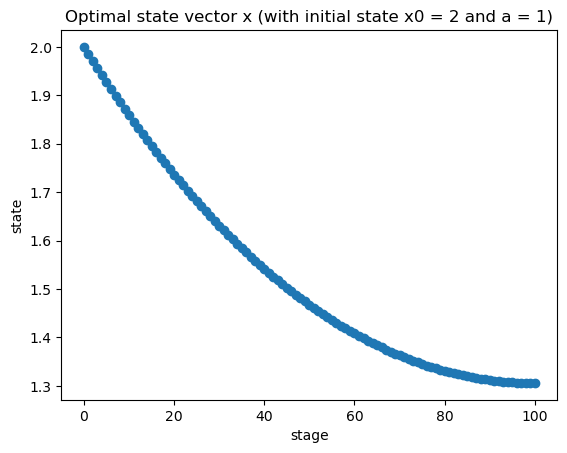

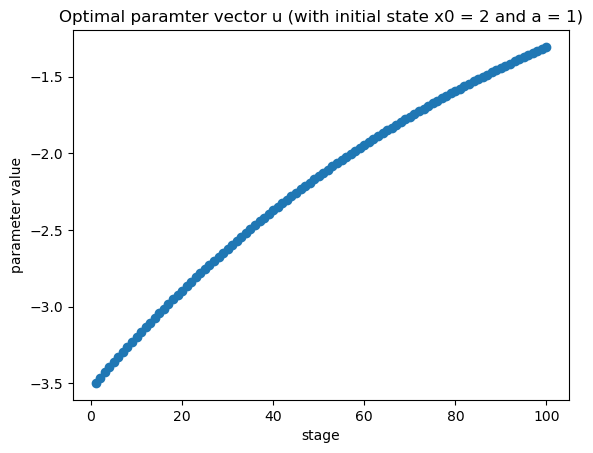

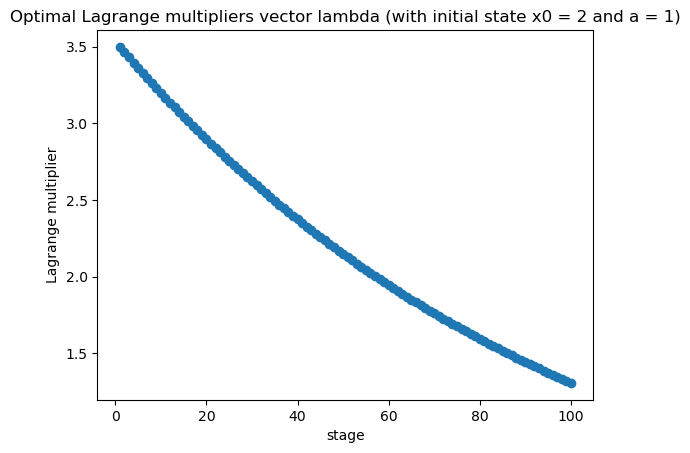

In [124]:
problem2(2,1)

The number of elements in vector S is: 100
The number of elements in vector x (including initial value x0) is: 101
The number of elements in vector lambda is: 100
The number of elements in vector u is: 100


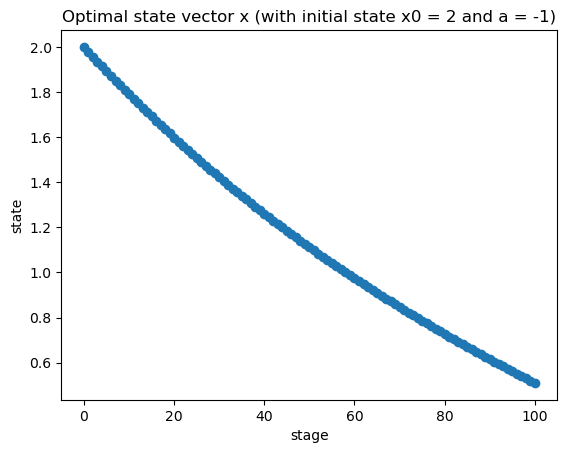

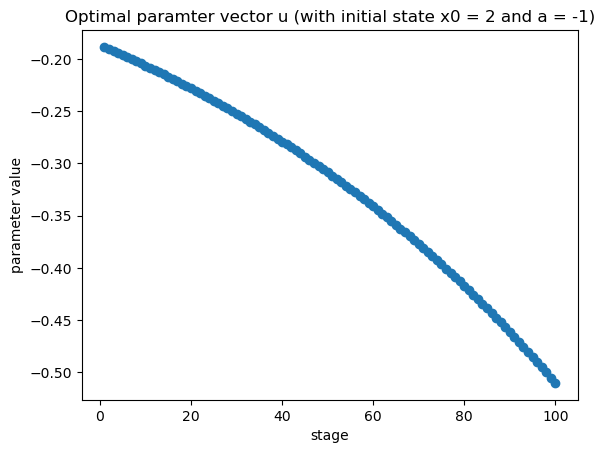

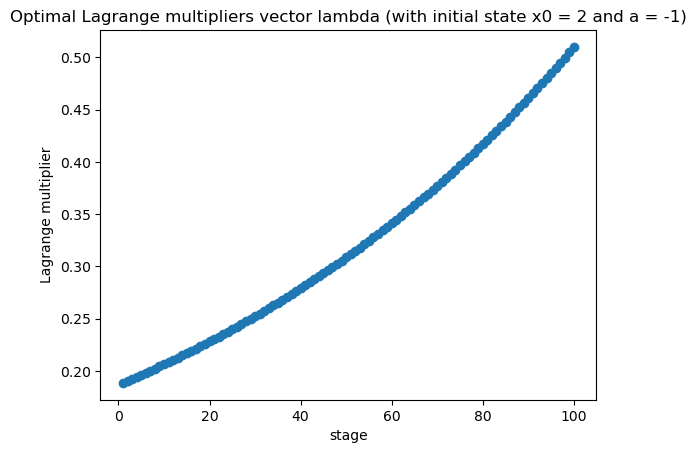

In [125]:
problem2(2,-1)